In [1]:
%matplotlib inline

# Introduction to Python for Environmental Science - Data Visualisation

![JCEEI logo](../jceei_logo.png)

Firstly, lets load some data using pandas.  

In [2]:
import pandas as pd
mean_temp_data_url = 'https://www.metoffice.gov.uk/hadobs/hadcet/data/meantemp_daily_totals.txt'
mean_temp_df = pd.read_csv(mean_temp_data_url, delimiter='\s+')
mean_temp_df.head()  # .head() allows us to print the first few lines of a DataFrame

,Date,Value
0,1772-01-01,3.2
1,1772-01-02,2.0
2,1772-01-03,2.7
3,1772-01-04,2.7
4,1772-01-05,1.5


This is data is a timeseries, meaning we have dates in one column and in the other column we have some value that corresponds to that date, here it is the mean daily temperature.

When loading data from a file, Pandas will try to do some magic and guess the data *type* (e.g. str, float, int etc) for each column. Because of how dates are stored in csv files, pandas has loaded the data in the date column as strings. Below we apply a function to convert the date strings to datetime objects. This isn't essential but makes some of the subsequent data manipulation and plotting easier. 

We are then also creating two new columns in our pandas DataFrame, one containing the year and the other the day of the year. This is to support plotting later on. 

In [3]:
import datetime
mean_temp_df['Date'] = mean_temp_df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

mean_temp_df['Year'] = mean_temp_df['Date'].apply(lambda x: x.year)
mean_temp_df['Day_of_year'] = mean_temp_df['Date'].apply(lambda x: int(x.strftime('%j')))

In [4]:
mean_temp_df.head()

,Date,Value,Year,Day_of_year
0,1772-01-01,3.2,1772,1
1,1772-01-02,2.0,1772,2
2,1772-01-03,2.7,1772,3
3,1772-01-04,2.7,1772,4
4,1772-01-05,1.5,1772,5


We also load in two more similar datasets, which contain the daily minimum and maximum temperature. 

In [5]:
min_temp_data_url = 'https://www.metoffice.gov.uk/hadobs/hadcet/data/mintemp_daily_totals.txt'
min_temp_df = pd.read_csv(min_temp_data_url, delimiter='\s+', header=0, names=['Date', 'Min_temp'], skiprows=1)

max_temp_data_url = 'https://www.metoffice.gov.uk/hadobs/hadcet/data/maxtemp_daily_totals.txt'
max_temp_df = pd.read_csv(max_temp_data_url, delimiter='\s+', header=0, names=['Date', 'Max_temp'], skiprows=1)

## Matplotlib

An important way of interacting with your data is to visualise it. Humans are able to take in a lot of information quickly through the sense of sight, so a good visualisation is a good way to interact with and interrogate the data. The standard way of visualising data in python is to plot it using Matplotlib.

Matplotlib is a Python package for producing 2D-graphics and provides a quick way to visualise data in Python. In this session we will cover how to produce some standard plots for data visualisation, but matplotlib is a powerful data visualisation tool with many examples with code given in the matplotlib gallery.

Here is a link to the matplotlib documentation: https://matplotlib.org/stable/index.html

Matplotlib gallery:https://matplotlib.org/stable/gallery/index.html 

In [6]:
# matplotlib.pyplot is often imported as plt
import matplotlib.pyplot as plt

### Plotting from pandas

It is also possible to plot directly from pandas, which uses matplotlib under the hood to produce visualisations. It allows you to quickly produce visualisation from data in a Pandas DataFrame. 

For each of these worked examples, I will show you both how to produce a plot using matplotlib directly, as well as using pandas plotting functionality. 

You'll notice with pandas plotting functionality, some of the formatting of plots is automatically handled for us. So it can be harder to tailor the plots to specifically what you want this way, but is very useful for producing nicely formetted plots quickly.

## Worked examples

### Timeseries plot

A timeseries plot is a standard line plot showing how a certain value varies over time. The x axis is typically time, and the y axis is the variable varying over time. 

Here we are plotting temperature for the year 2021:

In [7]:
temp_subset = mean_temp_df[mean_temp_df['Year']==2021]

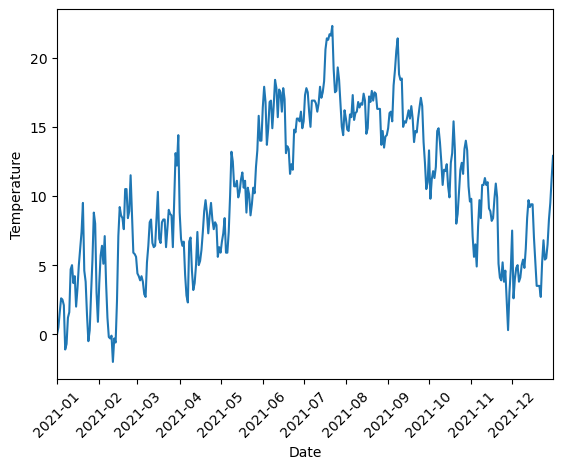

In [8]:
plt.plot(temp_subset['Date'], temp_subset['Value'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.margins(x=0)
plt.show()

#### Pandas implementation

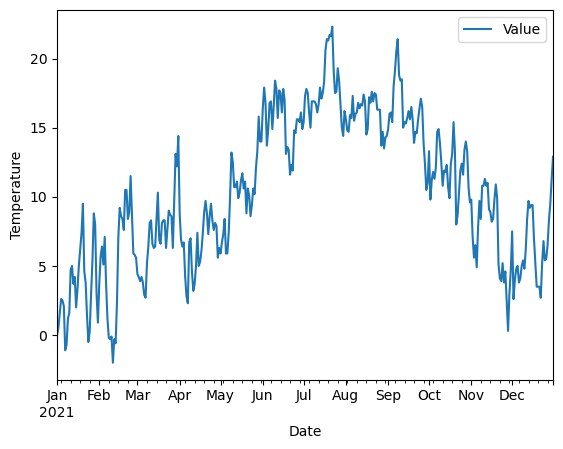

In [9]:
temp_subset.plot(x='Date', y='Value', ylabel='Temperature')
plt.show()

### Scatter plot

A scatter plot plots invidual data points on an axis representing the two dimensions. This is useful to determine if there looks like there is a relationship between the two variables.

In [10]:
max_min_df = pd.merge(min_temp_df, max_temp_df, right_on='Date', left_on='Date')

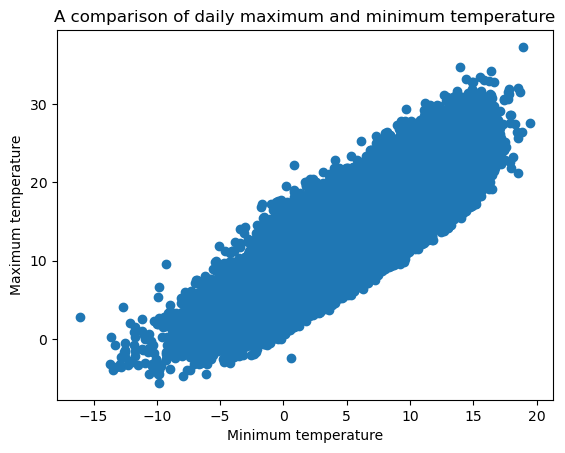

In [11]:
plt.scatter(max_min_df['Min_temp'], max_min_df['Max_temp'])
plt.ylabel('Maximum temperature')
plt.xlabel('Minimum temperature')
plt.title('A comparison of daily maximum and minimum temperature')
plt.show()

#### Pandas implementation

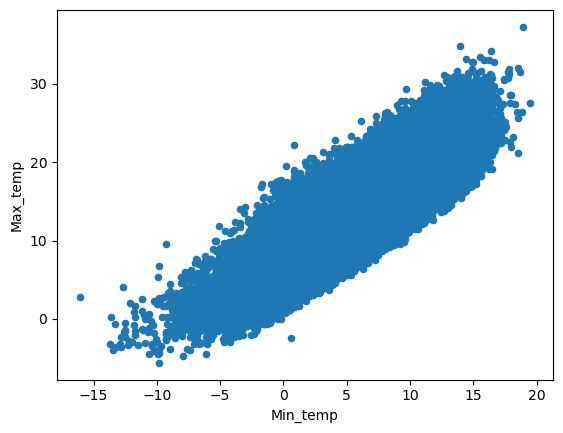

In [12]:
max_min_df.plot.scatter('Min_temp', 'Max_temp')
plt.show()

### Box and whisker plot

Box and whisker plots are a useful tool for assessing how the range and spread of values in your dataset within different groups.

For example here we will look at daily mean temperature groupby by year.

In [13]:
temp_subset = mean_temp_df[(mean_temp_df['Year']>=2000) & (mean_temp_df['Year']<2022)]

There is some preprocessing we have to do before we can plot a box and whisker plot of the data by year. The pivot function allows us to transform the data so we have the year as our column names and day of the year as our index (row names). 

In [14]:
temp_by_year = temp_subset.pivot(index='Day_of_year', columns='Year', values='Value').dropna()
temp_by_year

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Day_of_year,,,,,,,,,,,,,,,,,,,,,
1,5.4,4.0,-1.8,6.8,2.6,7.9,5.6,7.1,7.6,-0.8,...,9.9,5.3,7.5,7.5,4.6,5.3,5.5,8.0,5.2,-0.0
2,6.8,7.7,-1.6,7.1,3.7,5.1,4.6,6.4,4.9,1.1,...,7.0,7.1,7.4,7.0,6.0,2.1,6.8,1.8,7.0,0.5
3,7.9,5.1,0.1,3.5,2.8,7.0,5.6,8.3,1.8,-0.5,...,6.8,8.4,6.8,3.8,6.6,2.7,6.7,1.9,6.9,1.6
4,4.2,5.0,-0.1,1.4,3.6,8.1,4.9,8.9,4.0,-1.0,...,7.1,8.9,5.6,1.5,6.8,4.9,7.9,0.9,6.0,2.6
5,6.0,4.7,1.7,-0.7,7.1,5.3,1.7,9.1,5.7,0.2,...,7.0,9.1,6.5,4.0,7.8,1.2,4.6,2.6,6.7,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.6,4.0,9.0,3.7,0.6,0.5,5.3,7.9,3.3,4.0,...,6.0,5.4,1.6,10.8,6.4,1.9,7.1,6.1,3.8,6.5
362,-0.1,5.2,8.1,2.8,1.9,-1.1,6.0,10.2,1.2,0.6,...,6.3,4.7,1.5,10.0,2.6,2.1,7.7,7.1,4.5,8.3
363,-1.2,1.7,7.5,1.3,2.5,-0.9,8.9,6.1,1.9,0.9,...,7.8,5.8,0.8,10.6,0.6,4.2,9.5,7.8,1.0,9.5


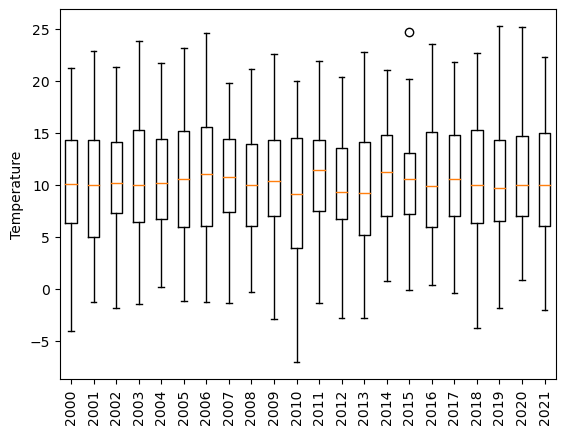

In [15]:
plt.boxplot(temp_by_year, labels=temp_by_year.columns)
plt.ylabel('Temperature')
plt.xticks(rotation=90)
plt.show()

#### Pandas implementation 

Note that we don't need to do the manual preprocessing of data that we had to do when producing the box and whisker plot manually in matplotlib. 

<AxesSubplot: title={'center': 'Value'}, xlabel='Year'>

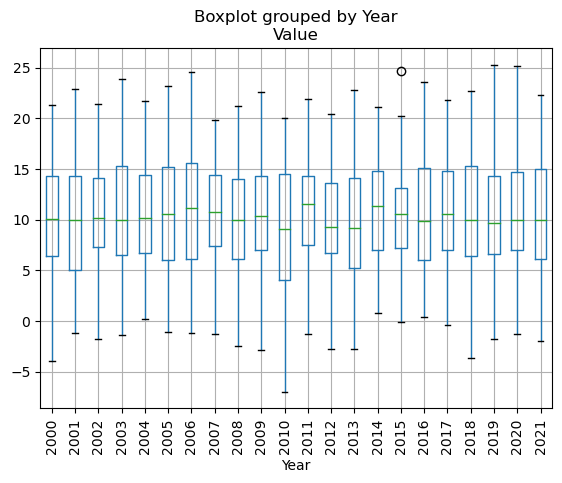

In [16]:
temp_subset.boxplot(column='Value', by='Year', rot=90)

### Exercise

Exercise: Using the mean_temp_df dataset, produce a scatter plot that compares the mean daily temperature with the day of the year

## Other useful materials

SciPy lecture on matplotlib: http://scipy-lectures.org/intro/matplotlib/index.html